# SARSA and Q-learning for Cliff Walking

Here we implement SARSA and Q-learning for the simple Cliff Walking example of Sutton and Barto (2018), p. 132.

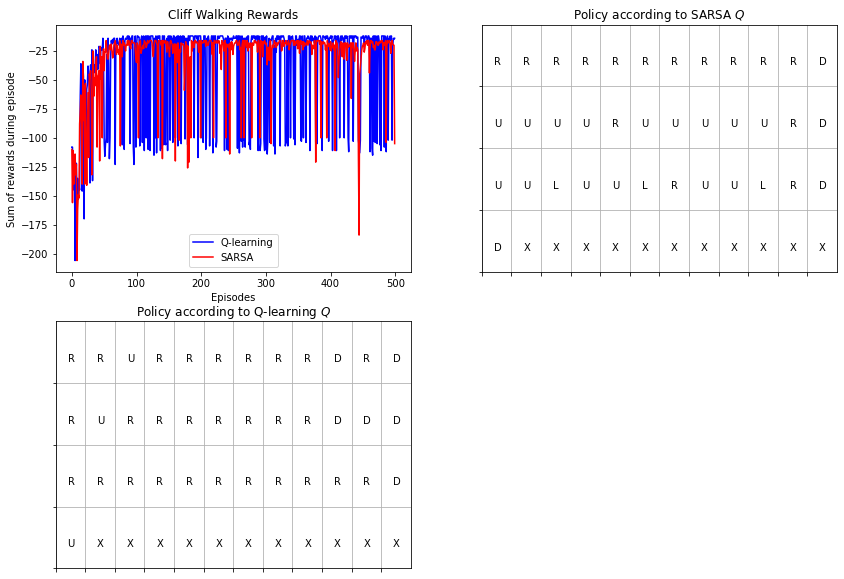

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Define the MDP:
# - S is the set of pairs (r, c) with rows r in 0..3 and cols c in 0..11
# - A is the set 0..3 for up, down, right, left
# - gamma is 1 (undiscounted episodic task)
# - Psa is deterministic motion on the grid, implemented by env(s, a)
# - R is -1 everywhere except the goal (11, 0) (0) and the cliff (1, 0) to (10, 0)
# - Start state is always (0, 0)

gamma = 1
s_initial = (0, 0)
s_terminal = { (0, 1): True, (0, 2): True, (0, 3): True, (0, 4): True, (0, 5): True,
               (0, 6): True, (0, 7): True, (0, 8): True, (0, 9): True, (0, 10): True, (0, 11): True }
s_goal = (0, 11)
n_actions = 4

def reward(s):
    if s == s_goal:
        return 0
    elif s in s_terminal.keys():
        return -100
    else:
        return -1

def env(s, a):
    srow = s[0]
    scol = s[1]
            
    if a == 0:
        srow += 1
    elif a == 1:
        srow -= 1
    elif a == 2:
        scol += 1
    elif a == 3:
        scol -= 1
    
    if srow > 3:
        srow = 3
    elif srow < 0:
        srow = 0
    if scol < 0:
        scol = 0
    elif scol > 11:
        scol = 11

    return (srow, scol), reward((srow, scol))

# Policy based on Q: epsilon-greedy

def epsilon_greedy(Q, s, epsilon):
    if np.random.uniform() < epsilon:
        return np.random.randint(n_actions)
    else:
        return np.argmax(Q[s])

# Inputs: alpha, epsilon

alpha = 0.5
epsilon = 0.1

# Initialize Q to 0 for all states, actions

def init_Q():
    Q = {}
    for srow in range(4):
        for scol in range(12):
            s = (srow, scol)
            Q[s] = [0] * n_actions
    return Q

def learn_sarsa():
    Q = init_Q()
    n_episodes = 500
    episode_rewards = []
    for episode in range(n_episodes):
        s = s_initial
        a = epsilon_greedy(Q, s, epsilon)
        rewards = 0
        while s not in s_terminal.keys():
            sprime, r = env(s, a)
            aprime = epsilon_greedy(Q, sprime, epsilon)
            Q[s][a] = Q[s][a] + alpha * (r + gamma * Q[sprime][aprime] - Q[s][a])
            rewards += r
            s = sprime
            a = aprime
        episode_rewards.append(rewards)
    return episode_rewards, Q

def learn_q():
    Q = init_Q()
    n_episodes = 500
    episode_rewards = []
    for episode in range(n_episodes):
        s = s_initial
        rewards = 0
        while s not in s_terminal.keys():
            a = epsilon_greedy(Q, s, epsilon)
            sprime, r = env(s, a)
            aprime = np.argmax(Q[sprime])
            Q[s][a] = Q[s][a] + alpha * (r + gamma * Q[sprime][aprime] - Q[s][a])
            rewards += r
            s = sprime
            a = aprime
        episode_rewards.append(rewards)
    return episode_rewards, Q

sarsa_rewards, sarsa_Q = learn_sarsa()
qlearning_rewards, qlearning_Q = learn_q()

def plot_policy(Q, ax, title):
    plt.xlim(0, 12)
    plt.ylim(0, 4)
    plt.xticks(np.arange(0, 12, 1))
    plt.yticks(np.arange(0, 4, 1))
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    plt.grid()
    action_names = ['U', 'D', 'R', 'L', 'X']
    for srow in range(4):
        for scol in range(12):
            s = (srow, scol)
            if s in s_terminal.keys():
                a = 4
            else:
                a = np.argmax(Q[s])
            plt.text(scol+0.4, srow+0.35, action_names[a])
    plt.title(title)
    
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
plt.plot(qlearning_rewards, 'b-', label='Q-learning')
plt.plot(sarsa_rewards, 'r-', label='SARSA')
plt.xlabel('Episodes')
plt.ylabel('Sum of rewards during episode')
plt.title('Cliff Walking Rewards')
plt.legend()
ax = plt.subplot(2, 2, 2)
plot_policy(sarsa_Q, ax, 'Policy according to SARSA $Q$')
ax = plt.subplot(2, 2, 3)
plot_policy(qlearning_Q, ax, 'Policy according to Q-learning $Q$')
plt.show()